In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [5]:
## PSEUDOCODE ##
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3.Group the cities in sets of 50 to log the process as we find the weather data for each city.
#     - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#     - City, country, and date
#     - Latitude and longitude
#     - Maximum temperature
#     - Humidity
#     - Cloudiness
#     - Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | saint-augustin
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | lahaina
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | kibre mengist
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | antigonish
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | rincon
Processing Record 19 of Set 1 | boguchany
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | thompson
Process

Processing Record 36 of Set 4 | bredasdorp
Processing Record 37 of Set 4 | satipo
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | ames
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | riyadh
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | ballaghaderreen
Processing Record 44 of Set 4 | saint-francois
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | olinda
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | shalya
Processing Record 49 of Set 4 | dakar
Processing Record 50 of Set 4 | batagay
Processing Record 1 of Set 5 | gigmoto
Processing Record 2 of Set 5 | arkhipo-osipovka
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | vasterhaninge
Processing Record 5 of Set 5 | kalmunai
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | auki
Processing Record 8 of Set 5 | gat
Processing Record 9 of Set 5 | biu


Processing Record 25 of Set 8 | tateyama
Processing Record 26 of Set 8 | puerto escondido
Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | fallon
Processing Record 29 of Set 8 | thayetmyo
Processing Record 30 of Set 8 | neryungri
Processing Record 31 of Set 8 | udarnyy
Processing Record 32 of Set 8 | thaton
Processing Record 33 of Set 8 | dohar
Processing Record 34 of Set 8 | tahta
Processing Record 35 of Set 8 | bilibino
Processing Record 36 of Set 8 | monastyrshchina
Processing Record 37 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 38 of Set 8 | victoria
Processing Record 39 of Set 8 | hukuntsi
Processing Record 40 of Set 8 | chitral
Processing Record 41 of Set 8 | bridlington
Processing Record 42 of Set 8 | kirksville
Processing Record 43 of Set 8 | walvis bay
Processing Record 44 of Set 8 | buckeye
Processing Record 45 of Set 8 | kysyl-syr
Processing Record 46 of Set 8 | hobyo
Processing Record 47 of Set 8 | severo-kurilsk
Processing R

Processing Record 10 of Set 12 | nadym
Processing Record 11 of Set 12 | barzas
Processing Record 12 of Set 12 | lancaster
Processing Record 13 of Set 12 | yaval
Processing Record 14 of Set 12 | apt
Processing Record 15 of Set 12 | ormara
Processing Record 16 of Set 12 | turinsk
Processing Record 17 of Set 12 | minas
Processing Record 18 of Set 12 | singaraja
Processing Record 19 of Set 12 | kiunga
Processing Record 20 of Set 12 | gritsovskiy
Processing Record 21 of Set 12 | rio grande
Processing Record 22 of Set 12 | margate
Processing Record 23 of Set 12 | moundsville
Processing Record 24 of Set 12 | omsukchan
Processing Record 25 of Set 12 | bitung
Processing Record 26 of Set 12 | urucara
Processing Record 27 of Set 12 | sabzevar
Processing Record 28 of Set 12 | collie
Processing Record 29 of Set 12 | galich
Processing Record 30 of Set 12 | chunskiy
Processing Record 31 of Set 12 | curanilahue
Processing Record 32 of Set 12 | katobu
Processing Record 33 of Set 12 | petatlan
Processin

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,58.93,50,83,11.07,NZ,2021-10-01 01:35:42
1,Port Elizabeth,-33.9180,25.5701,62.89,100,90,4.61,ZA,2021-10-01 01:35:42
2,Saint-Augustin,51.2260,-58.6502,46.94,92,100,24.99,CA,2021-10-01 01:35:43
3,Port Alfred,-33.5906,26.8910,60.62,91,2,10.87,ZA,2021-10-01 01:31:08
4,Lahaina,20.8783,-156.6825,84.20,88,18,9.91,US,2021-10-01 01:35:43
5,Punta Arenas,-53.1500,-70.9167,41.11,65,75,16.11,CL,2021-10-01 01:35:44
6,Vila Franca Do Campo,37.7167,-25.4333,70.20,90,28,2.75,PT,2021-10-01 01:35:44
7,Nemuro,43.3236,145.5750,66.63,90,100,9.89,JP,2021-10-01 01:35:44
8,Clyde River,70.4692,-68.5914,33.71,73,100,8.90,CA,2021-10-01 01:35:45
9,Atuona,-9.8000,-139.0333,78.13,73,3,17.29,PF,2021-10-01 01:35:45


In [9]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-10-01 01:35:42,-46.2817,169.8464,58.93,50,83,11.07
1,Port Elizabeth,ZA,2021-10-01 01:35:42,-33.9180,25.5701,62.89,100,90,4.61
2,Saint-Augustin,CA,2021-10-01 01:35:43,51.2260,-58.6502,46.94,92,100,24.99
3,Port Alfred,ZA,2021-10-01 01:31:08,-33.5906,26.8910,60.62,91,2,10.87
4,Lahaina,US,2021-10-01 01:35:43,20.8783,-156.6825,84.20,88,18,9.91
5,Punta Arenas,CL,2021-10-01 01:35:44,-53.1500,-70.9167,41.11,65,75,16.11
6,Vila Franca Do Campo,PT,2021-10-01 01:35:44,37.7167,-25.4333,70.20,90,28,2.75
7,Nemuro,JP,2021-10-01 01:35:44,43.3236,145.5750,66.63,90,100,9.89
8,Clyde River,CA,2021-10-01 01:35:45,70.4692,-68.5914,33.71,73,100,8.90
9,Atuona,PF,2021-10-01 01:35:45,-9.8000,-139.0333,78.13,73,3,17.29


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

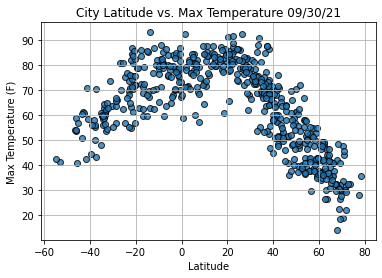

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

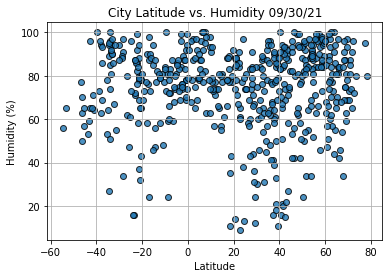

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

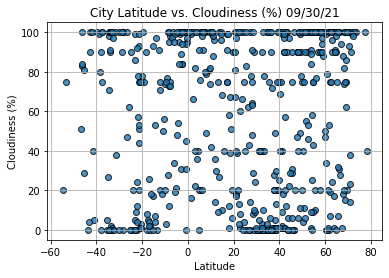

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

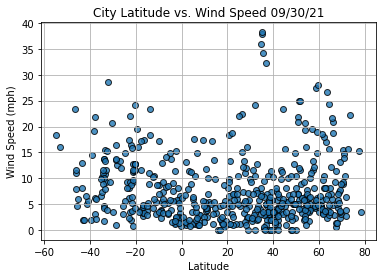

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()